# Task 1

You know how numbers are represented in fixed form. Use any method to obtain binary representation for each of these numbers in both 32-bit and 64 bit form according to [standard](https://en.wikipedia.org/wiki/IEEE_754-2008_revision):
- `-1`
- `-1024`
- `10e20`
- `127.‭0009765625‬`

Write your solution in a blocks below. Validate with tests.

In [ ]:
# write your solution here in any form, as formulas of code
#
#
#
#

In [ ]:
# run the tests to validate your computations
o32 = 0b00000000000000000000000000000000  # 0
o64 = 0b0000000000000000000000000000000000000000000000000000000000000000 # 0

a32 = 0b1_01111111_00000000000000000000000  # -1
#### EVERYTHING below will fail
a64 = 0b0000000000000000000000000000000000000000000000000000000000000000 # -1

b32 = 0b00000000000000000000000000000000  # -1024
b64 = 0b0000000000000000000000000000000000000000000000000000000000000000 # -1024

c32 = 0b00000000000000000000000000000000  # 10e20
c64 = 0b0000000000000000000000000000000000000000000000000000000000000000 # 10e20

d32 = 0b00000000000000000000000000000000  # 127.‭0009765625
d64 = 0b0000000000000000000000000000000000000000000000000000000000000000 # 127.‭0009765625

import ctypes
from ctypes import c_double, c_float, c_uint32, c_uint64

def bits_to_cfloat(bits, base=32):
    i = c_uint32(bits) if base == 32 else c_uint64(bits)
    return ctypes.cast(
        ctypes.addressof(i), 
        ctypes.POINTER(c_float if base == 32 else c_double))[0]  #

assert 0.0 == bits_to_cfloat(o32, 32), "0 test 32"
assert 0.0 == bits_to_cfloat(o32, 64), "0 test 64"

assert -1 == bits_to_cfloat(a32, 32), "-1 test 32"
assert -1 == bits_to_cfloat(a64, 64), "-1 test 64"

assert -1024 == bits_to_cfloat(a32, 32), "-1024 test 32"
assert -1024 == bits_to_cfloat(a64, 64), "-1024 test 64"

assert 10.0e20 == bits_to_cfloat(c32, 32), "10e20 test 32"
assert 10.0e20 == bits_to_cfloat(c64, 64), "10e20 test 64"

f = 127.0009765625
assert f == bits_to_cfloat(d32, 32), "f test 32"
assert f == bits_to_cfloat(d64, 64), "f test 64"

# Task 2

Consider a set of values:
$x\in \{\frac{1}{2^{32}}, \frac{1}{2^{31}}, ..., 1, 2^{1}, 2^{2}, ..., 2^{32}\}$ 
This set oubiuously sums to ${2^{33}}-2^{-32}$

In [48]:
print(f"{2 ** 33 - 2 ** (-32):.11f}")

8589934592.00000000000


But look!

In [89]:
from random import shuffle

X = [2 ** i for i in range(-32, 33)]

print(sum(X))
shuffle(X)
print(f"{sum(X):.10f}")

8589934592.0
8589934591.9999990463


Implement your own `mysum()` function which always give the same result for a shuffled version of a list:

In [ ]:
def mysum(A):
    # TODO write your code here
    return sum(A)

X = [2 ** i for i in range(-32, 33)]
S = []
for i in range(100):
    shuffle(X)
    S.append(mysum(X))  

for i in range(99):
    assert S[i] == S[i + 1], "Validation failed"

# Task 3

Small caterpillar $\vec{x}$ is very stupid. So, it can only move according to an evolution matrix $A$.

$\vec{x}_{tomorrow} = A\times\vec{x}_{today}$

One day it started from $[1, 0]^T$ and in 32 days occured in $[16.17409135, -13.57167409]^T$.

One day it started from $[0, 1]^T$ and in 32 days occured in $[13.57167409, 16.17409135]^T$.

1. Restore $A$.
  - If you need to solve $A\times A = B$ for $A$, use `scipy.linalg.sqrtm` [link](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.linalg.sqrtm.html)
  - Your solution will, most probably, involve complex numbers. To keep real part you can use `np.real(A)` [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.real.html).
2. Plot the path of a caterpillar in 2D.

[[ 5.71938767]
 [-9.06949818]]


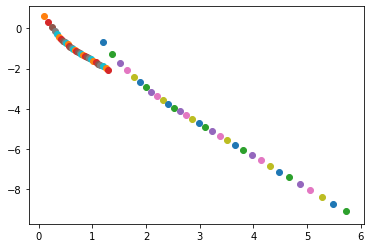

In [138]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy.linalg

x0 = np.matrix([[1., 0.]]).T
x1 = np.matrix([[0., 1.]]).T

# this is a wrong matrix!!! Find your own!
A = np.matrix([[1.2, 0.1], [-0.7, 0.6]])

for i in range(32):
    x0 = A * x0
    x1 = A * x1
    plt.scatter(x0[0, 0], x0[1, 0])
    plt.scatter(x1[0, 0], x1[1, 0])

print(x0)
plt.show()

Dest = np.matrix([[16.17409135, -13.57167409], 
                  [13.57167409, 16.17409135]]).T